# Entregable Data Preparation

In [495]:
#importamos librerías y herramientas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [496]:
import sys

print(sys.executable)


C:\Users\rafas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


## Creamos el Data Frame y lo nombramos _df_bmw_

In [497]:
df_bmw = pd.read_csv("./data/bmw_pricing_v3.csv")

In [498]:
# ESTRUCTURA DE DATOS
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [499]:
df_bmw

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


### Revisamos si hay duplicados para eliminar

In [500]:
df_bmw.duplicated(keep=False).sum()

np.int64(0)

### Comprobamos si hay nulos

In [501]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

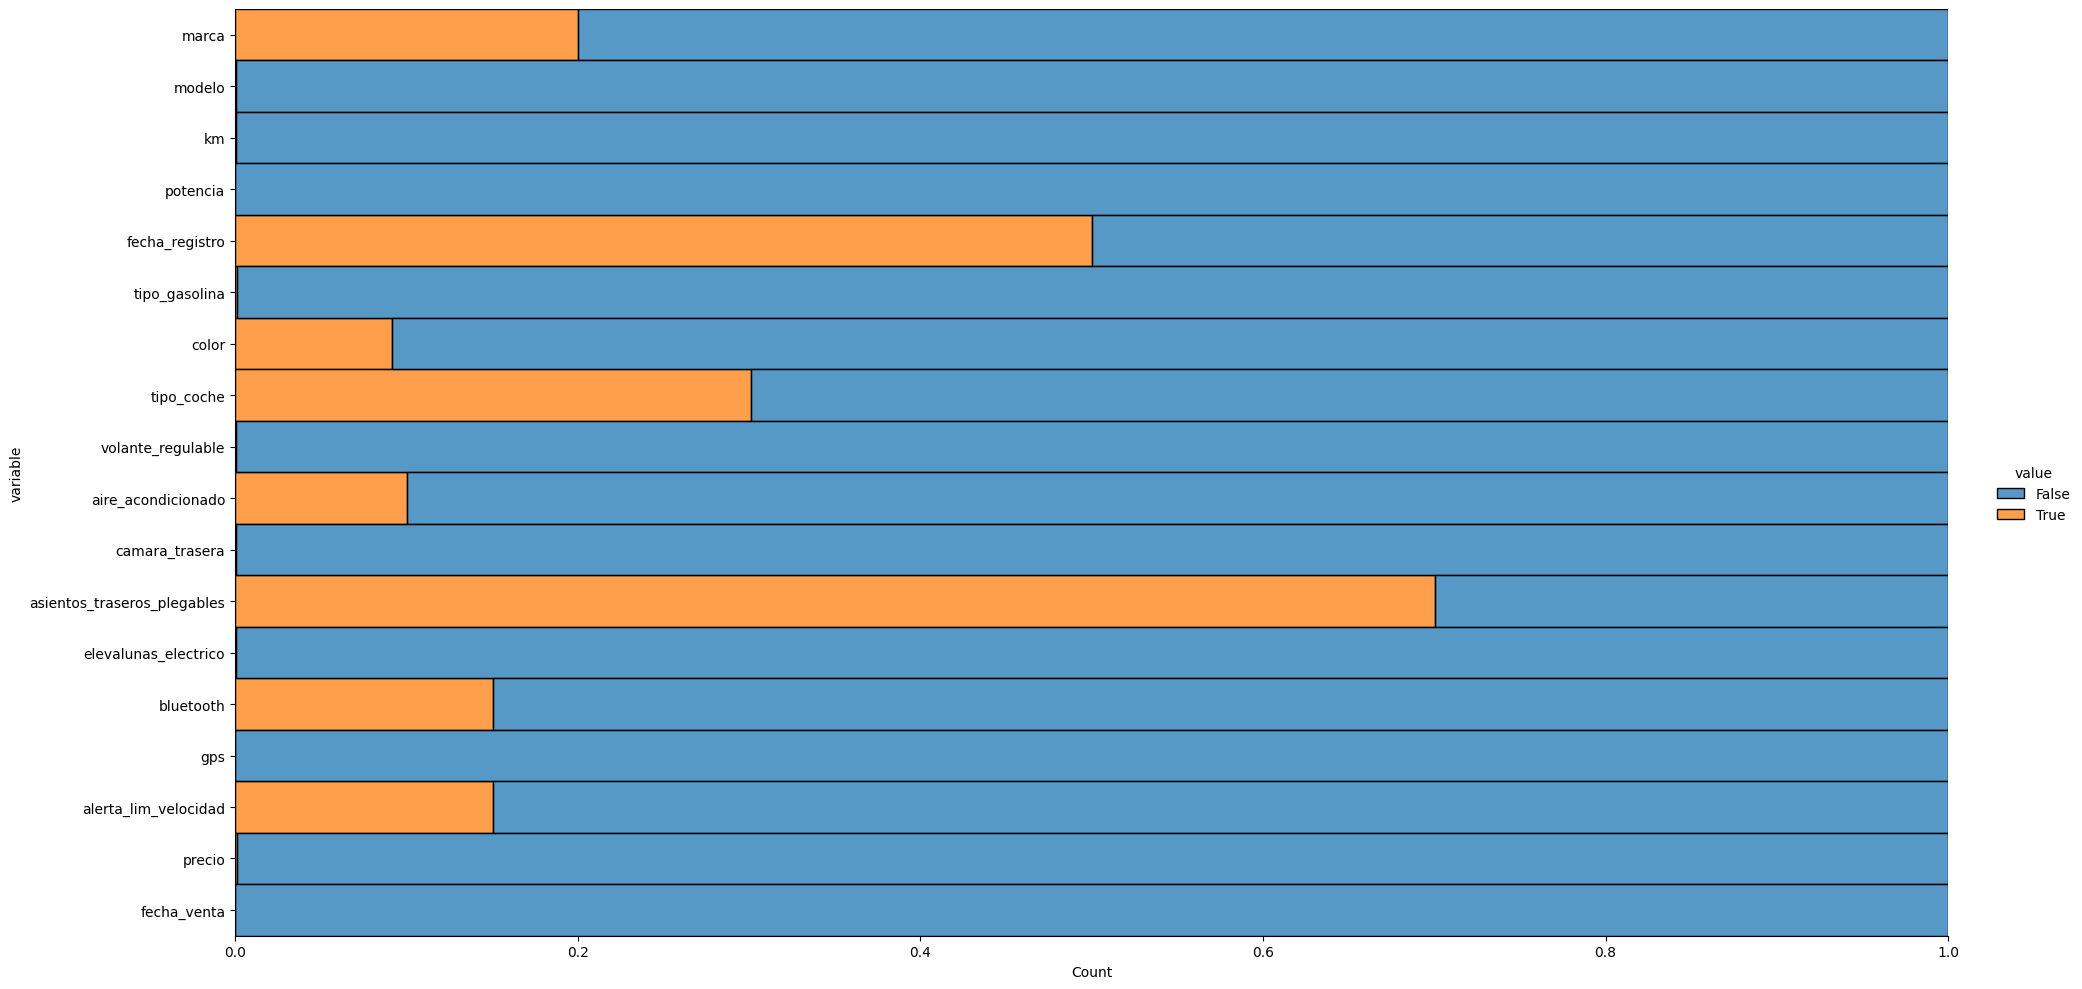

In [502]:
df_bmw.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2,height=10
)));

### eliminamos filas cuya presencia de nulos representan menos del 1%

In [503]:
for i in df_bmw:
    if df_bmw[i].isnull().sum() < 10:
        df_bmw.dropna(subset=[i],inplace=True)
  
df_bmw.isnull().sum()

marca                           965
modelo                            0
km                                0
potencia                          0
fecha_registro                 2409
tipo_gasolina                     0
color                           442
tipo_coche                     1449
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3373
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_venta                       0
dtype: int64

### hecho esto analizaremos variable por variable

In [504]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3852 non-null   object 
 1   modelo                       4817 non-null   object 
 2   km                           4817 non-null   float64
 3   potencia                     4817 non-null   float64
 4   fecha_registro               2408 non-null   object 
 5   tipo_gasolina                4817 non-null   object 
 6   color                        4375 non-null   object 
 7   tipo_coche                   3368 non-null   object 
 8   volante_regulable            4817 non-null   object 
 9   aire_acondicionado           4335 non-null   object 
 10  camara_trasera               4817 non-null   object 
 11  asientos_traseros_plegables  1444 non-null   object 
 12  elevalunas_electrico         4817 non-null   object 
 13  bluetooth              

### Variable **Marca**
Observamos que tiene solo dos únicos valores y como sabemos que el dataset es de BMW, los nulos lo completamos con la moda y/o la misma marca. Al tratarse de toda la columna el mismo valor, decidimos eliminarla.

In [505]:
df_bmw["marca"].unique()

array([nan, 'BMW'], dtype=object)

In [506]:
del(df_bmw['marca'])

### Variable **Color**
Observamos su distribución con _normalize_ y lo reemplazamos los nulos con la moda

In [507]:
df_bmw["color"].unique()

array(['black', 'grey', 'white', 'red', 'silver', 'blue', nan, 'orange',
       'beige', 'brown', 'green'], dtype=object)

In [508]:
df_bmw["color"].value_counts(normalize=True)

color
black     0.340343
grey      0.243886
blue      0.146971
white     0.109714
brown     0.069029
silver    0.066286
red       0.010743
beige     0.008457
green     0.003200
orange    0.001371
Name: proportion, dtype: float64

In [509]:
df_bmw["color"].value_counts(normalize=True)

color
black     0.340343
grey      0.243886
blue      0.146971
white     0.109714
brown     0.069029
silver    0.066286
red       0.010743
beige     0.008457
green     0.003200
orange    0.001371
Name: proportion, dtype: float64

In [510]:

df_bmw['color'].fillna(df_bmw['color'].mode()[0], inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_22220\3000990387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw['color'].fillna(df_bmw['color'].mode()[0], inplace=True)


### Variable **tipo_coche**
Reemplazamos los nulos con _sin tipo_

In [511]:
df_bmw[["tipo_coche"]]

,tipo_coche
0,NaN
1,convertible
2,NaN
3,convertible
4,NaN
...,...
4838,NaN
4839,NaN
4840,van
4841,van


In [512]:
df_bmw['tipo_coche'].fillna('sin tipo', inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_22220\1102255687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw['tipo_coche'].fillna('sin tipo', inplace=True)


### Variable **asientos_traseros_plegables**

In [513]:
df_bmw[df_bmw["asientos_traseros_plegables"]==True]["modelo"]

60                   435
111                  420
118       430 Gran Coupé
150       430 Gran Coupé
290                  530
              ...       
4775                  X1
4780                  X1
4783                  X3
4793                X5 M
4817    320 Gran Turismo
Name: modelo, Length: 301, dtype: object

### creamos una lista con los modelos que tienen asientos plegables

In [514]:

modelos_con_asientos_plegables = df_bmw[df_bmw["asientos_traseros_plegables"] == True]["modelo"]

### rellenar los valores nulos en la columna asientos_plegables con True de todos los modelos de la lista

In [515]:

df_bmw.loc[df_bmw["modelo"].isin(modelos_con_asientos_plegables) & df_bmw["asientos_traseros_plegables"].isnull(), "asientos_traseros_plegables"] = True

### de igual forma análoga lo hacemos para los que son False

In [516]:
modelos_sin_asientos_plegables = df_bmw[df_bmw["asientos_traseros_plegables"] == False]["modelo"]


In [517]:
df_bmw.loc[df_bmw["modelo"].isin(modelos_sin_asientos_plegables) & df_bmw["asientos_traseros_plegables"].isnull(), "asientos_traseros_plegables"] = False

In [518]:
df_bmw["asientos_traseros_plegables"].isnull().sum()

np.int64(17)

### eliminamos las filas nulas


In [519]:
df_bmw.dropna(subset=["asientos_traseros_plegables"],inplace=True)

### Variable **bluetooth**

In [520]:
df_bmw['bluetooth'].isnull().sum()

np.int64(724)

In [521]:
df_bmw["bluetooth"].value_counts()

bluetooth
False    3091
True      985
Name: count, dtype: int64

### operamos igual que con asientos traseros plegables, pero dando prioridad a False ya que es el valor que mas se repite...sería como aplicar la moda, pero dejando espacio para rellanar algunos nulos con True, si es que queda alguno.

In [522]:
sin_bluetooth =df_bmw[df_bmw["bluetooth"]==False]["modelo"]

In [523]:
df_bmw.loc[df_bmw["modelo"].isin(sin_bluetooth) & df_bmw["bluetooth"].isnull(), "bluetooth"] = False

In [524]:
con_bluetooth =df_bmw[df_bmw["bluetooth"]==True]["modelo"]

In [525]:
df_bmw.loc[df_bmw["modelo"].isin(con_bluetooth) & df_bmw["bluetooth"].isnull(), "bluetooth"] = True

In [526]:
df_bmw["bluetooth"].isnull().sum()

np.int64(0)

In [527]:
df_bmw["bluetooth"].value_counts()

bluetooth
False    3808
True      992
Name: count, dtype: int64

### Variable **alerta_lim_velocidad**

In [528]:
df_bmw['alerta_lim_velocidad'].value_counts()  # evaluamos luego

alerta_lim_velocidad
True     2215
False    1861
Name: count, dtype: int64

In [529]:
con_alerta = df_bmw[df_bmw["alerta_lim_velocidad"]==True & df_bmw["fecha_registro"].notnull()]["modelo"]

In [530]:
con_alerta

5                     335
8                      Z4
9                     320
13                    420
16                    220
              ...        
4837      218 Gran Tourer
4838      218 Gran Tourer
4839    218 Active Tourer
4840      218 Gran Tourer
4841    218 Active Tourer
Name: modelo, Length: 2066, dtype: object

In [531]:
df_bmw.loc[df_bmw["modelo"].isin(con_alerta) & df_bmw["alerta_lim_velocidad"].isnull(), "alerta_lim_velocidad"] = True

In [532]:
df_bmw["alerta_lim_velocidad"].fillna(False, inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_22220\354760519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["alerta_lim_velocidad"].fillna(False, inplace=True)
C:\Users\rafas\AppData\Local\Temp\ipykernel_22220\354760519.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["alerta_lim_velocidad"

In [533]:
df_bmw['alerta_lim_velocidad'].value_counts() 

alerta_lim_velocidad
True     2937
False    1863
Name: count, dtype: int64

###  cambiamos el formato de fechas.

In [534]:
df_bmw['fecha_registro']=pd.to_datetime(df_bmw['fecha_registro'])
df_bmw['fecha_venta']=pd.to_datetime(df_bmw['fecha_venta'])

### Creamos una nueva columna "Antiguedad" en años, ya que sabemos que la antigüedad es el principal factor de depreciacion de vehículos.

In [535]:
df_bmw["antiguedad"]= round((df_bmw["fecha_venta"]-df_bmw["fecha_registro"])/ np.timedelta64(1,'m'))/(1440*365)

In [536]:
df_bmw["antiguedad"].isnull().sum()

np.int64(2403)

### calculamos la moda global de antiguedad 


In [537]:
moda_global = df_bmw["antiguedad"].mode()[0]

### rellenamos con la moda de cada modelo y si no tiene moda le aplicamos la global

In [538]:
df_bmw['antiguedad'] = df_bmw.groupby('modelo')['antiguedad'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else moda_global))

In [539]:
df_bmw['antiguedad'].isnull().sum()

np.int64(0)

### Observamos nuestra nueva variable mediante un describe y nos damos cuenta que contiene valores negativos, lo cual no es posible. 


In [540]:
df_bmw["antiguedad"].describe()

count    4800.000000
mean        4.863174
std         2.000639
min        -5.504110
25%         4.002740
50%         4.416438
75%         5.002740
max        28.104110
Name: antiguedad, dtype: float64

In [541]:
df_bmw.drop(df_bmw[df_bmw["antiguedad"]<0].index, axis=0, inplace=True)

In [542]:
df_bmw

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,118,140411.0,100.0,2012-02-01,diesel,black,sin tipo,True,True,False,False,True,False,True,True,11300.0,2018-01-01,5.920548
2,320,183297.0,120.0,2012-04-01,diesel,white,sin tipo,False,False,False,True,True,False,True,False,10200.0,2018-02-01,5.841096
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,True,True,True,True,True,25100.0,2018-02-01,3.917808
4,425,97097.0,160.0,NaT,diesel,silver,sin tipo,True,True,False,False,False,True,True,True,33400.0,2018-04-01,4.002740
5,335,152352.0,225.0,2011-05-01,petrol,black,sin tipo,True,True,False,False,True,True,True,True,17100.0,2018-02-01,6.761644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,sin tipo,False,True,False,False,False,False,True,False,14600.0,2018-08-01,2.501370
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,sin tipo,False,True,False,False,False,False,True,True,17500.0,2018-08-01,3.169863
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2018-09-01,2.920548
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01,2.419178


### exploro los valores nulos que me quedan 

In [543]:
df_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2403
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado              478
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            0
fecha_venta                       0
antiguedad                        0
dtype: int64

### decidimos eliminar fecha de registro y fecha de venta porque ya tenemos la columna antigüedad que engloba a ambas features

In [544]:
df_bmw.drop(["fecha_venta","fecha_registro"], axis=1, inplace=True)

### exploramos aire acondicionado e inputamos nulos 


In [545]:
df_bmw["aire_acondicionado"].value_counts()

aire_acondicionado
True     3435
False     885
Name: count, dtype: int64

In [546]:
df_bmw[(df_bmw['aire_acondicionado'].isnull()) ]["modelo"].unique()

array(['420', '220', 'Z4', '118', '435 Gran Coupé', '320', '335', '218',
       '640', '318', '316', '520', '525', '530', '535', '518', '330',
       'M550', '120', '116', '420 Gran Coupé', '520 Gran Turismo', 'i3',
       '318 Gran Turismo', '114', '125', '418 Gran Coupé',
       '320 Gran Turismo', '123', '325 Gran Turismo', '740', '730',
       '640 Gran Coupé', 'X1', 'X3', 'X6', 'X5', 'X6 M', 'X4', 'X5 M',
       '218 Active Tourer', '218 Gran Tourer'], dtype=object)

### vemos que la mayoria de vehiculos son modernos, posteriores al año 2000,  donde ya los vehiculos de alta gama todos traen aire acondicionado de serie. por lo que inputamos la moda

In [547]:
df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0], inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_22220\3794903880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0], inplace=True)
C:\Users\rafas\AppData\Local\Temp\ipykernel_22220\3794903880.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

## una vez hemos inputado todos los nulos ahora vemos de nuevo todos los duplicados para asegurarnos que al inputar nulos no apareció ninguno

In [548]:
df_bmw.duplicated().sum()

np.int64(0)

In [549]:
df_bmw["modelo"] = df_bmw["modelo"].astype(str)


### Analisis de variables


In [550]:
df_bmw.describe()

,km,potencia,precio,antiguedad
count,4.798000e+03,4798.000000,4798.000000,4798.000000
mean,1.410430e+05,128.731763,15802.209254,4.866696
std,6.011635e+04,38.391741,9139.494284,1.993216
min,-6.400000e+01,0.000000,100.000000,0.589041
25%,1.030672e+05,100.000000,10900.000000,4.002740
50%,1.410655e+05,120.000000,14200.000000,4.416438
75%,1.752478e+05,135.000000,18600.000000,5.002740
max,1.000376e+06,423.000000,178500.000000,28.104110


### nos llama la atención que hay vehiculos con km negativos, potencia = 0 y precios de 100 € , por lo que veremos en mas detalle estas variables numéricas

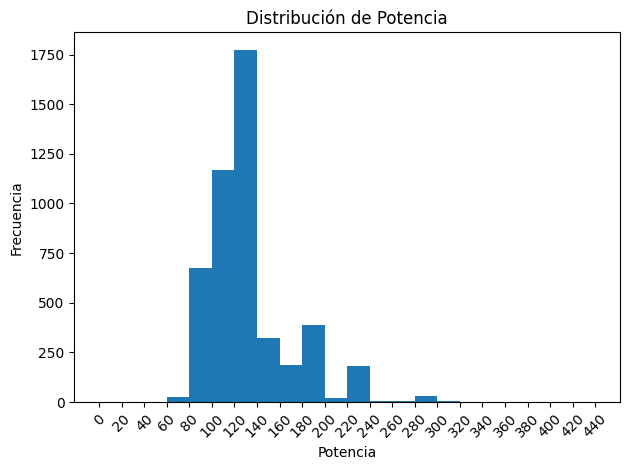

In [551]:
# Crear el histograma con los intervalos de 20
plt.hist(df_bmw["potencia"], bins=np.arange(min(df_bmw["potencia"]), max(df_bmw["potencia"]) + 20, 20))

# Ajustar las etiquetas del eje x para que vayan de 20 en 20 y rotarlas en diagonal
plt.xticks(np.arange(min(df_bmw["potencia"]), max(df_bmw["potencia"]) + 20, 20), rotation=45)

# Añadir etiquetas y mostrar el gráfico
plt.xlabel('Potencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Potencia')
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se corten
plt.show()

### miramos los vehiculos con potencia inferior a 70kw, podemos eliminarlos porque no representan ni el 1% del dataset...aunque es cierto que por ejemplo vehiculos i3 tenemos pocos y sabemos que este modelo solo se fabricó con una potencia de 125kw por lo que podriamos inputarle esta potencia a todos los modelos. De ahí la importancia de entender del negocio para tomar decisiones mas acertadas en el tratamiento de los datos


In [552]:
df_bmw[df_bmw["potencia"]<70]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
1796,i3,152328.0,25.0,hybrid_petrol,black,sin tipo,False,True,False,False,False,False,True,True,20300.0,2.331507
1925,i3,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,2.331507
2390,318,170529.0,66.0,diesel,silver,hatchback,False,False,True,True,False,False,False,False,1000.0,5.002740
2771,316,146951.0,66.0,petrol,white,sedan,False,False,False,False,False,False,False,False,1300.0,28.104110
3765,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,False,True,11700.0,3.416438


In [553]:
df_bmw[df_bmw["modelo"]=="i3"]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
1796,i3,152328.0,25.0,hybrid_petrol,black,sin tipo,False,True,False,False,False,False,True,True,20300.0,2.331507
1895,i3,26542.0,75.0,electro,grey,sin tipo,False,True,False,False,False,False,True,True,20900.0,3.926027
1925,i3,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,2.331507
2317,i3,78740.0,75.0,electro,grey,hatchback,True,True,False,False,False,False,True,False,20800.0,2.331507
2363,i3,46359.0,125.0,electro,white,hatchback,True,True,False,False,False,False,True,True,21200.0,4.583562
3690,i3,6572.0,75.0,hybrid_petrol,black,sin tipo,True,True,True,False,False,False,True,True,28000.0,2.331507


In [554]:
df_bmw.loc[df_bmw["modelo"] == "i3", "potencia"] = 125


### eliminamos el resto menos el 316

In [555]:
df_bmw.drop(df_bmw[(df_bmw["potencia"]<70) & (df_bmw["modelo"]!="316")].index, axis=0,inplace=True)

### eliminamos km negativos

In [556]:
df_bmw.drop(df_bmw[df_bmw["km"]<0].index, axis=0,inplace=True)

### analizamos potencia

<Axes: xlabel='antiguedad', ylabel='precio'>

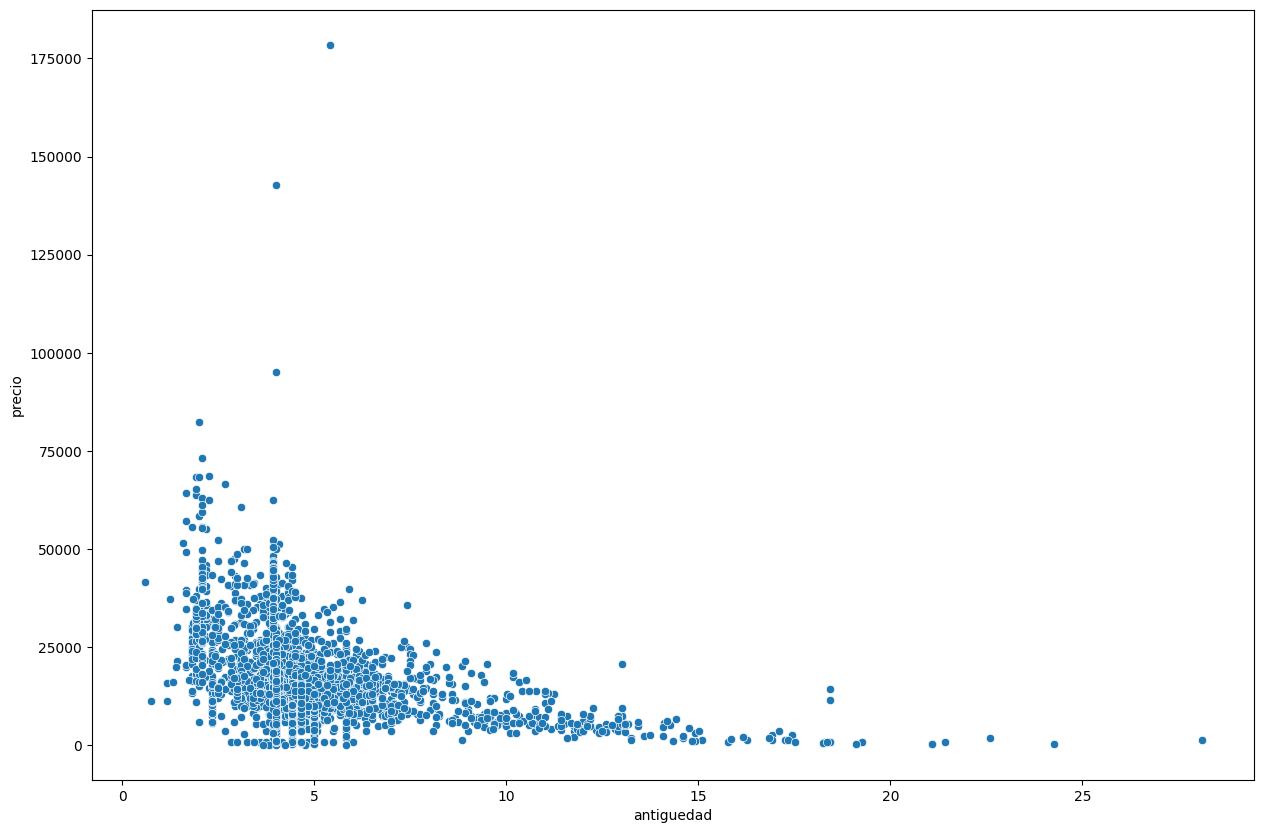

In [557]:
plt.subplots(figsize=(15, 10)); sns.scatterplot(x="antiguedad", y="precio", data=df_bmw)

<Axes: xlabel='antiguedad', ylabel='precio'>

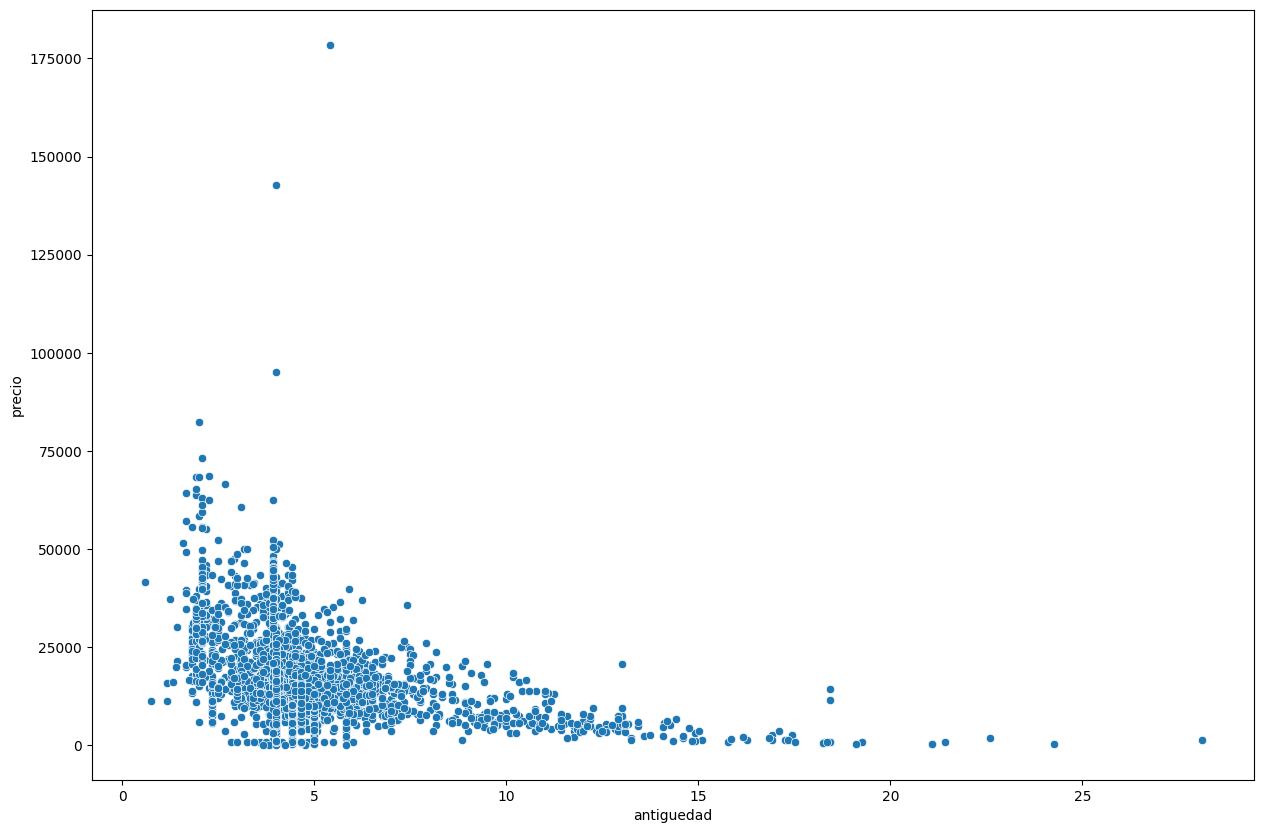

In [558]:
plt.subplots(figsize=(15, 10)); sns.scatterplot(x="antiguedad", y="precio", data=df_bmw)

<Axes: xlabel='precio'>

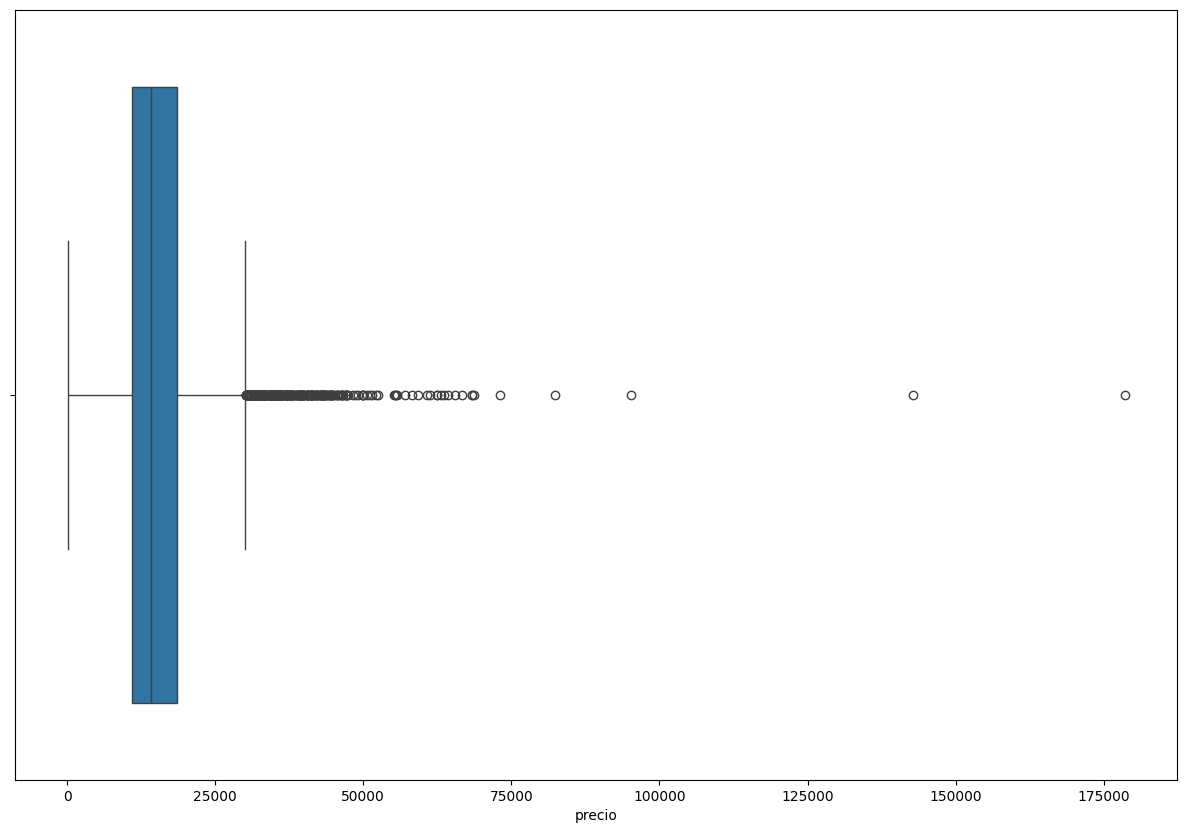

In [559]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="precio", data=df_bmw)

In [560]:
df_bmw[df_bmw["precio"]>55000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
68,640 Gran Coupé,67403.0,230.0,diesel,black,coupe,True,True,True,True,True,True,True,True,55200.0,2.172603
90,i8,12402.0,170.0,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,4.002740
2678,530,5578.0,195.0,diesel,grey,sedan,True,True,True,True,False,False,True,True,62500.0,3.917808
2775,730,13418.0,195.0,diesel,black,sedan,True,True,True,True,False,False,True,True,58300.0,2.000000
2824,740,58299.0,235.0,diesel,grey,sedan,True,True,False,True,False,False,True,True,63700.0,1.915068
3069,740,42655.0,235.0,diesel,grey,sin tipo,True,True,True,True,False,False,True,True,65400.0,1.915068
3320,740,25858.0,235.0,diesel,black,sedan,True,True,False,True,False,False,True,True,68300.0,1.915068
3345,740,25571.0,235.0,diesel,black,sedan,True,True,False,True,False,False,True,True,68300.0,2.000000
3595,740,34624.0,235.0,diesel,grey,sedan,True,True,True,True,False,True,True,True,68700.0,2.252055
3829,X6 M,39725.0,280.0,diesel,black,suv,False,True,False,True,True,True,True,False,64300.0,1.671233


### eliminamos el modelo X3 que consideramos outlier de precio

In [561]:
df_bmw.drop(df_bmw[(df_bmw["precio"]>55000) & (df_bmw["modelo"]=="X3")].index, axis=0, inplace=True)

### eliminamos también todos los vehículos que con menos de 10 años tienen precio inferior a 3000 euros, porque consideramos que el precio no se corresponde con el modelo, o si es su precio real se puede deber a que estan accidentados y eso podria desvirtuar la prediccion de vehículos en estado de circulación

In [562]:
df_bmw.drop(df_bmw[(df_bmw["precio"]<=3000) & (df_bmw["antiguedad"]<=10)].index , axis=0 , inplace=True)

### eliminamos también todos los vehículos que con menos de 5 años tienen precio inferior a 5000 euros, porque consideramos que el precio no se corresponde con el modelo, o si es su precio real se puede deber a que estan accidentados y eso podria desvirtuar la prediccion de vehículos en estado de circulación

In [563]:
df_bmw.drop(df_bmw[(df_bmw["precio"]<=5000) & (df_bmw["antiguedad"]<=5)].index , axis=0 , inplace=True)

In [564]:
df_bmw.reset_index(inplace=True)

In [565]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        4663 non-null   int64  
 1   modelo                       4663 non-null   object 
 2   km                           4663 non-null   float64
 3   potencia                     4663 non-null   float64
 4   tipo_gasolina                4663 non-null   object 
 5   color                        4663 non-null   object 
 6   tipo_coche                   4663 non-null   object 
 7   volante_regulable            4663 non-null   object 
 8   aire_acondicionado           4663 non-null   bool   
 9   camara_trasera               4663 non-null   object 
 10  asientos_traseros_plegables  4663 non-null   object 
 11  elevalunas_electrico         4663 non-null   object 
 12  bluetooth                    4663 non-null   object 
 13  gps               

### Variable tipo_gasolina

In [566]:
df_bmw["tipo_gasolina"].value_counts(normalize=True)

tipo_gasolina
diesel           0.959468
petrol           0.037101
hybrid_petrol    0.001716
Diesel           0.001072
electro          0.000643
Name: proportion, dtype: float64

### al ver esta distribución decidimos eliminar la variable tipo_gasolina porque no aporta valor a la prediccion ya que el 96% de los casos es diesel

In [567]:
del(df_bmw["tipo_gasolina"])

In [568]:
df_bmw

,index,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
0,0,118,140411.0,100.0,black,sin tipo,True,True,False,False,True,False,True,True,11300.0,5.920548
1,2,320,183297.0,120.0,white,sin tipo,False,False,False,True,True,False,True,False,10200.0,5.841096
2,3,420,128035.0,135.0,red,convertible,True,True,False,True,True,True,True,True,25100.0,3.917808
3,4,425,97097.0,160.0,silver,sin tipo,True,True,False,False,False,True,True,True,33400.0,4.002740
4,5,335,152352.0,225.0,black,sin tipo,True,True,False,False,True,True,True,True,17100.0,6.761644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,4838,218 Gran Tourer,39743.0,110.0,black,sin tipo,False,True,False,False,False,False,True,False,14600.0,2.501370
4659,4839,218 Active Tourer,49832.0,100.0,grey,sin tipo,False,True,False,False,False,False,True,True,17500.0,3.169863
4660,4840,218 Gran Tourer,19633.0,110.0,grey,van,False,True,False,False,False,False,True,True,17000.0,2.920548
4661,4841,218 Active Tourer,27920.0,110.0,brown,van,True,True,False,False,False,False,True,True,22700.0,2.419178


In [569]:
df_bmw.drop(["index"], axis=1, inplace=True)

### Observamos que hay variables de tipo Objeto que son booleanas y las casteamos

In [570]:
#Añadimos la columna con tipo booleana
list_to_cast=['volante_regulable','camara_trasera','elevalunas_electrico','asientos_traseros_plegables','bluetooth']
for i in list_to_cast:
  df_bmw[i] = df_bmw[i].astype(bool)

In [571]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4663 non-null   object 
 1   km                           4663 non-null   float64
 2   potencia                     4663 non-null   float64
 3   color                        4663 non-null   object 
 4   tipo_coche                   4663 non-null   object 
 5   volante_regulable            4663 non-null   bool   
 6   aire_acondicionado           4663 non-null   bool   
 7   camara_trasera               4663 non-null   bool   
 8   asientos_traseros_plegables  4663 non-null   bool   
 9   elevalunas_electrico         4663 non-null   bool   
 10  bluetooth                    4663 non-null   bool   
 11  gps                          4663 non-null   bool   
 12  alerta_lim_velocidad         4663 non-null   bool   
 13  precio            

In [572]:
df_bmw["tipo_coche"].value_counts()

tipo_coche
sin tipo       1405
estate         1052
sedan           807
suv             738
hatchback       471
subcompact       72
coupe            69
convertible      28
van              21
Name: count, dtype: int64

### Siguiendo con el análisis univariable y después de revisar el detalle de la variable modelo, observamos grupos que pertenecen a un cierto tipo_coche, los validamos y aseguramos los evidentes, trabajo sobre una copia nueva

In [573]:
df_bmw['tipo_coche'].value_counts()

tipo_coche
sin tipo       1405
estate         1052
sedan           807
suv             738
hatchback       471
subcompact       72
coupe            69
convertible      28
van              21
Name: count, dtype: int64

### ahora vamos a asignar modelos de coche a grupos definidos


In [574]:

models_to_suv =[]
for i in df_bmw['modelo'].unique():
  if ((i[0]=='X') & (len(i)==2)):
    #print(i)
    models_to_suv.append(i)

models_to_suv

['X3', 'X5', 'X1', 'X4', 'X6']

### como conocedores de la marca sabemos que todos los modelos que contengan la X son SUV

In [575]:

for i in models_to_suv:
  df_bmw.loc[df_bmw[(df_bmw['modelo']==i)].index,'tipo_coche']="suv"

### Todos los modelos que contengan el término "tourer" son van

In [576]:

models_to_tourer =[]
for i in df_bmw['modelo'].unique():
  if (i.find('Tourer')!=-1):
    #print(i)
    models_to_tourer.append(i)


for i in models_to_tourer:
  df_bmw.loc[df_bmw[(df_bmw['modelo']==i)].index,'tipo_coche']="van"

### Todos los modelo que contengan el término "coupe" son coupe

In [577]:

models_to_coupe =[]
for i in df_bmw['modelo'].unique():
  if (i.find('Coupé')!=-1):
    #print(i)
    models_to_coupe.append(i)

#models_to_coupe
for i in models_to_coupe:
  df_bmw.loc[df_bmw[(df_bmw['modelo']==i)].index,'tipo_coche']="coupe"

### Decidimos asignar modelos dentro de una nueva columna serie en particular, para esto reconocemos que cada serie engloba cierto tipo de modelos

In [578]:
df_bmw['modelo'].unique()

array(['118', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', 'M235', '435',
       '640', '640 Gran Coupé', '435 Gran Coupé', 'i8', '630',
       '430 Gran Coupé', '520', '316', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', 'X5', 'X1', 'X4', 'X6', 'X6 M', 'X5 M',
       '218 Active Tourer', '218 Gran Tourer', '216 Gran Tourer',
       '214 Gran Tourer'], dtype=object)

In [579]:
def asignar_serie(modelo):
    if modelo.startswith('1') or modelo.startswith('X1') or modelo.startswith('M1'):
        return 'Serie 1'
    elif modelo.startswith('2') or modelo.startswith(' Active Tourer') or modelo.startswith('M2'):
        return 'Serie 2'
    elif modelo.startswith('3') or modelo.startswith('X3') or modelo.startswith('M3') or modelo.startswith('i3'):
        return 'Serie 3'
    elif modelo.startswith('4') or modelo.startswith('X4') or modelo.startswith('M4'):
        return 'Serie 4'
    elif modelo.startswith('5') or modelo.startswith('X5') or modelo.startswith('ActiveHy') or modelo.startswith('M5'):
        return 'Serie 5'
    elif modelo.startswith('6') or modelo.startswith('X6') :
        return 'Serie 6'
    elif modelo.startswith('7') or modelo.startswith('i8'):
        return 'Serie 7'
    elif modelo.startswith('Z'):
        return 'Serie Z'
    else:
        return 'Otro'  # Si no coincide con ninguna serie conocida

### Creamos una nueva columna 'serie' aplicando la función asignar_serie a la columna 'modelo'

In [580]:

df_bmw['serie'] = df_bmw['modelo'].apply(asignar_serie)

In [581]:
df_bmw['serie'].value_counts()

serie
Serie 3    2156
Serie 5    1374
Serie 1     802
Serie 4     147
Serie 6      80
Serie 7      54
Serie 2      44
Serie Z       6
Name: count, dtype: int64

### Hacemos la correlación para evaluar las variables

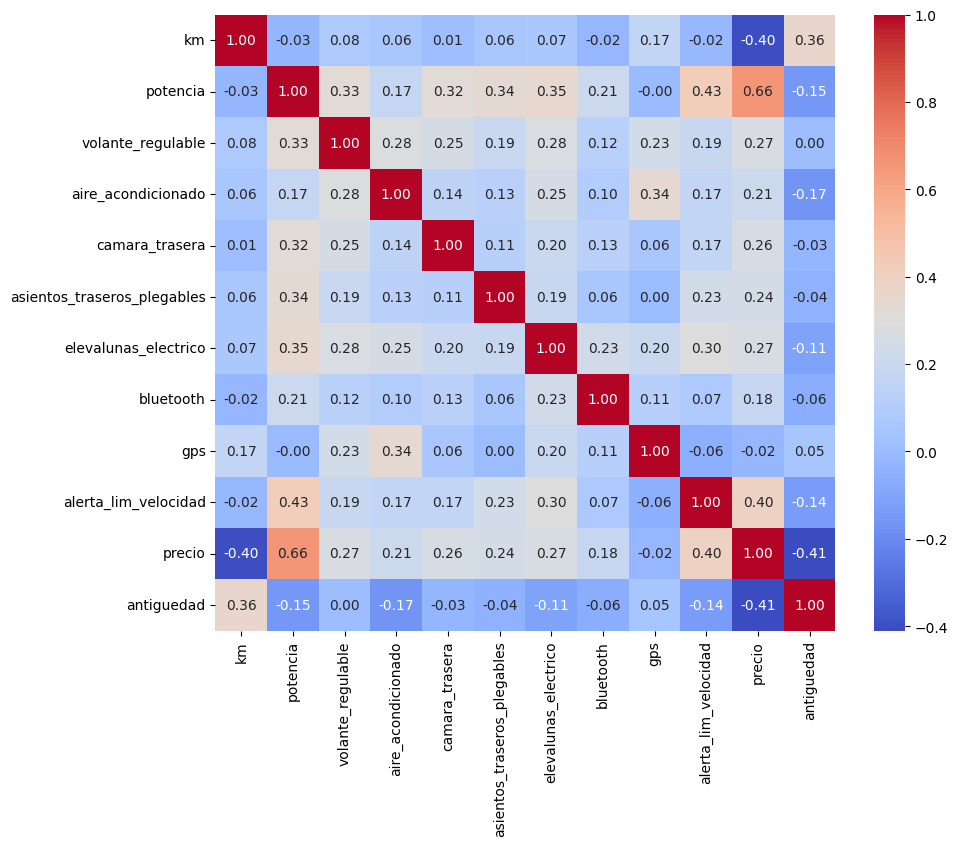

In [582]:
corr = df_bmw.corr(numeric_only=True)

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [583]:
df_bmw.head(1)

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie
0,118,140411.0,100.0,black,sin tipo,True,True,False,False,True,False,True,True,11300.0,5.920548,Serie 1


In [584]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4663 non-null   object 
 1   km                           4663 non-null   float64
 2   potencia                     4663 non-null   float64
 3   color                        4663 non-null   object 
 4   tipo_coche                   4663 non-null   object 
 5   volante_regulable            4663 non-null   bool   
 6   aire_acondicionado           4663 non-null   bool   
 7   camara_trasera               4663 non-null   bool   
 8   asientos_traseros_plegables  4663 non-null   bool   
 9   elevalunas_electrico         4663 non-null   bool   
 10  bluetooth                    4663 non-null   bool   
 11  gps                          4663 non-null   bool   
 12  alerta_lim_velocidad         4663 non-null   bool   
 13  precio            

### Separo mis Variables en 3 grupos(numéricas, booleanas, categóricas)

In [585]:
target=['precio']
def get_list_var(dataset):
    list_numbers=[]
    list_booleans=[]
    list_categories=[]

    for i in dataset:
      if (i not in target) and (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and (len(dataset[i].unique()) != 2):
        list_numbers.append(i)
      elif (i not in target) and (dataset[i].dtype.kind == 'b') and (len(dataset[i].unique())==2):
        list_booleans.append(i)
      elif (dataset[i].dtype.kind != 'o' and (i not in target)):
        list_categories.append(i)

    return list_numbers, list_booleans, list_categories

In [586]:
l_numericas, l_booleanos, l_categoricas = get_list_var(df_bmw)

In [587]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4663 non-null   object 
 1   km                           4663 non-null   float64
 2   potencia                     4663 non-null   float64
 3   color                        4663 non-null   object 
 4   tipo_coche                   4663 non-null   object 
 5   volante_regulable            4663 non-null   bool   
 6   aire_acondicionado           4663 non-null   bool   
 7   camara_trasera               4663 non-null   bool   
 8   asientos_traseros_plegables  4663 non-null   bool   
 9   elevalunas_electrico         4663 non-null   bool   
 10  bluetooth                    4663 non-null   bool   
 11  gps                          4663 non-null   bool   
 12  alerta_lim_velocidad         4663 non-null   bool   
 13  precio            

In [588]:
l_numericas

['km', 'potencia', 'antiguedad']

In [589]:
l_categoricas

['modelo', 'color', 'tipo_coche', 'serie']

In [590]:
l_booleanos

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

### Cambiaremos nuestras variables Booleanas a "0 y 1"

In [591]:
for i in l_booleanos:
 df_bmw[i] = np.where(df_bmw[i]==True, 1,0)

In [592]:
df_bmw.head(1)

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie
0,118,140411.0,100.0,black,sin tipo,1,1,0,0,1,0,1,1,11300.0,5.920548,Serie 1


### Hacemos un histograma de nuestras variables numéricas

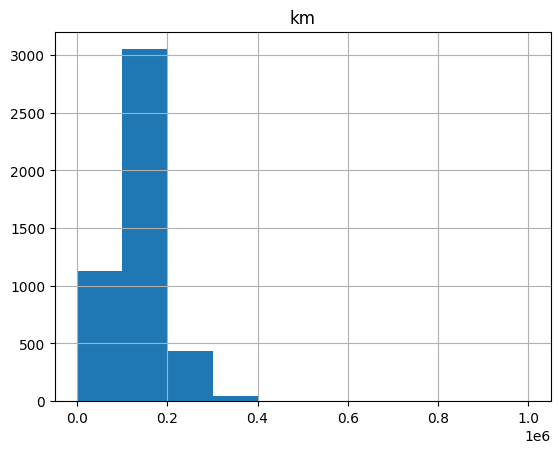

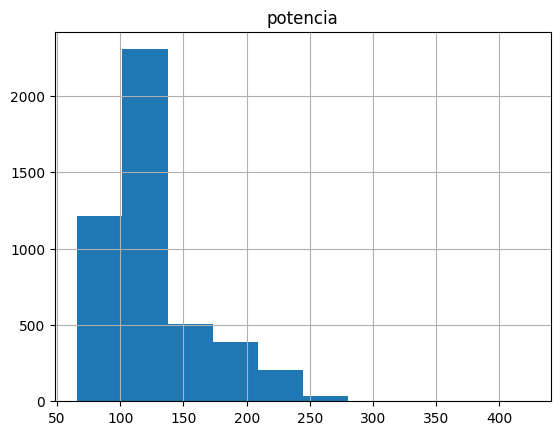

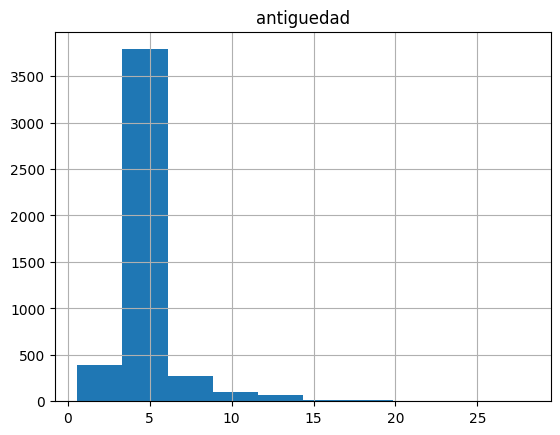

In [593]:
for i in l_numericas:
  df_bmw.hist(i)

### Hacemos gráficos de relación para nuestras variables categóricas

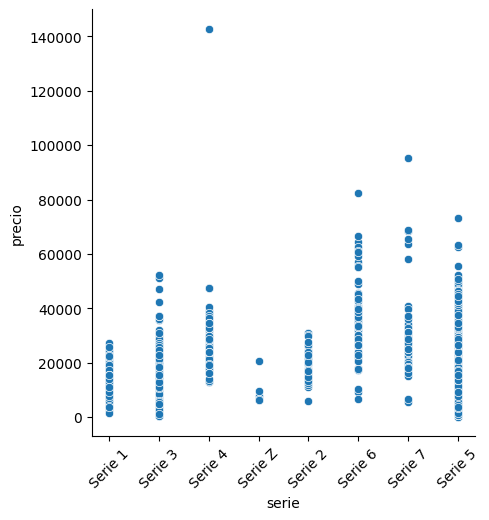

In [594]:
sns.relplot(data=df_bmw, x="serie", y="precio")
plt.xticks(rotation=45)
plt.show()

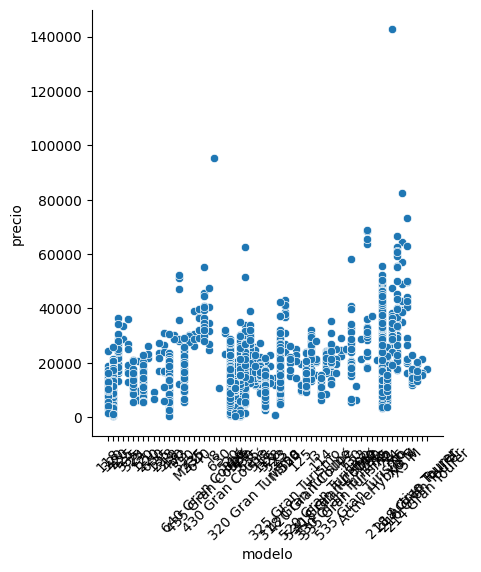

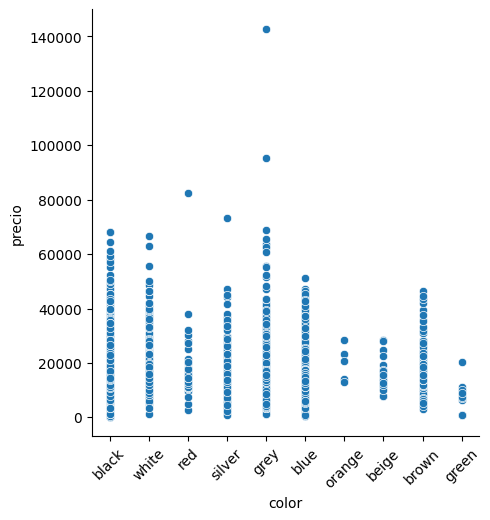

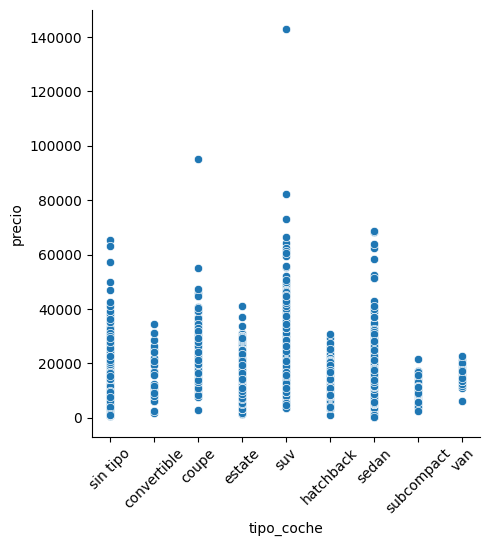

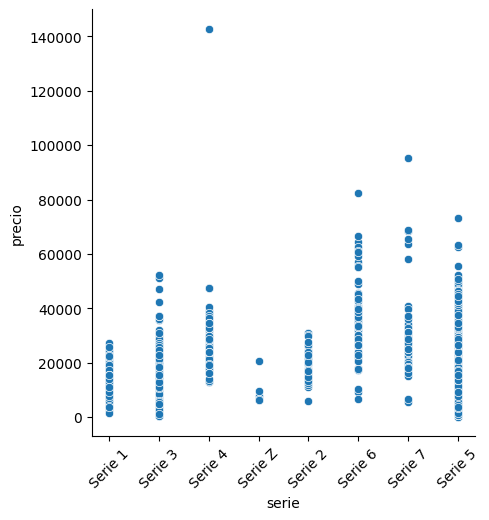

In [595]:
for i in l_categoricas:
  sns.relplot(data=df_bmw, x=i, y="precio")
  plt.xticks(rotation=45)
plt.show()

In [596]:
df_bmw[(df_bmw["serie"]=="Serie 6")& (df_bmw["precio"]>80000)]

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie
3983,X6 M,2970.0,423.0,red,suv,1,1,1,0,0,0,1,1,82400.0,2.0,Serie 6


In [597]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4663 non-null   object 
 1   km                           4663 non-null   float64
 2   potencia                     4663 non-null   float64
 3   color                        4663 non-null   object 
 4   tipo_coche                   4663 non-null   object 
 5   volante_regulable            4663 non-null   int64  
 6   aire_acondicionado           4663 non-null   int64  
 7   camara_trasera               4663 non-null   int64  
 8   asientos_traseros_plegables  4663 non-null   int64  
 9   elevalunas_electrico         4663 non-null   int64  
 10  bluetooth                    4663 non-null   int64  
 11  gps                          4663 non-null   int64  
 12  alerta_lim_velocidad         4663 non-null   int64  
 13  precio            

In [598]:
df_bmw.head(1)

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie
0,118,140411.0,100.0,black,sin tipo,1,1,0,0,1,0,1,1,11300.0,5.920548,Serie 1


In [599]:
df_bmw['color'].value_counts()

color
black     1875
grey      1028
blue       620
white      468
brown      301
silver     268
red         47
beige       37
green       13
orange       6
Name: count, dtype: int64

### Agrupamos color en "serie" y "personalizados", basandonos en que los de serie son los que habitalmente no te cobran como un extra y los personalizados son los colores diferentes a los de serie y por ende aplica un sobrecargo(lo cual nos da la pauta para darles valor diferente)

In [600]:
#Cambiamos los valores('black','white','red') a serie y los demás a personalizado
df_bmw['group_color'] = np.where((df_bmw['color'] =='black') | (df_bmw['color'] =='white') | (df_bmw['color'] =='red'), 'serie', 'personalizado')

In [601]:
df_bmw['group_color']

0               serie
1               serie
2               serie
3       personalizado
4               serie
            ...      
4658            serie
4659    personalizado
4660    personalizado
4661    personalizado
4662    personalizado
Name: group_color, Length: 4663, dtype: object

In [602]:
df_bmw['group_color'].value_counts()

group_color
serie            2390
personalizado    2273
Name: count, dtype: int64

### Para la variable color que lo agrupamos en group_color y la variable serie utilizo ordinalEncoder ya que le daré peso a mis items

In [603]:
oe = OrdinalEncoder(categories=[['serie','personalizado']])
oe

OrdinalEncoder(categories=[['serie', 'personalizado']])

In [604]:
df_bmw['color_int'] = oe.fit_transform(df_bmw[['group_color']])

In [605]:
oe = OrdinalEncoder(categories=[['Serie 1','Serie 2','Serie 3','Serie 4','Serie Z','Serie 5','Serie 6','Serie 7']])
oe

OrdinalEncoder(categories=[['Serie 1', 'Serie 2', 'Serie 3', 'Serie 4',
                            'Serie Z', 'Serie 5', 'Serie 6', 'Serie 7']])

In [606]:
df_bmw['serie_int'] = oe.fit_transform(df_bmw[['serie']])

In [607]:
df_bmw.reset_index(inplace=True,drop=True)

In [608]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4663 non-null   object 
 1   km                           4663 non-null   float64
 2   potencia                     4663 non-null   float64
 3   color                        4663 non-null   object 
 4   tipo_coche                   4663 non-null   object 
 5   volante_regulable            4663 non-null   int64  
 6   aire_acondicionado           4663 non-null   int64  
 7   camara_trasera               4663 non-null   int64  
 8   asientos_traseros_plegables  4663 non-null   int64  
 9   elevalunas_electrico         4663 non-null   int64  
 10  bluetooth                    4663 non-null   int64  
 11  gps                          4663 non-null   int64  
 12  alerta_lim_velocidad         4663 non-null   int64  
 13  precio            

In [609]:
df_bmw.head(1)

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie,group_color,color_int,serie_int
0,118,140411.0,100.0,black,sin tipo,1,1,0,0,1,0,1,1,11300.0,5.920548,Serie 1,serie,0.0,0.0


In [610]:
list_to_delete2 = ['modelo','color','group_color','serie']
for i in list_to_delete2:
  del(df_bmw[i])

In [611]:
df_bmw.head()

,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,color_int,serie_int
0,140411.0,100.0,sin tipo,1,1,0,0,1,0,1,1,11300.0,5.920548,0.0,0.0
1,183297.0,120.0,sin tipo,0,0,0,1,1,0,1,0,10200.0,5.841096,0.0,2.0
2,128035.0,135.0,convertible,1,1,0,1,1,1,1,1,25100.0,3.917808,0.0,3.0
3,97097.0,160.0,sin tipo,1,1,0,0,0,1,1,1,33400.0,4.002740,1.0,3.0
4,152352.0,225.0,sin tipo,1,1,0,0,1,1,1,1,17100.0,6.761644,0.0,2.0


### Para mi única varible categórica que queda **tipo_coche** utilizo _get_dummies_

In [612]:
df_bmw=pd.get_dummies(data=df_bmw, columns=['tipo_coche'],dtype=int)

In [613]:
df_bmw.head(1)

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,serie_int,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,1,1,0,0,1,0,1,1,...,0.0,0,0,0,0,0,1,0,0,0


In [614]:
pd.set_option('display.max_columns', None)

In [615]:
pd.reset_option("max_columns")

### Ahora aplico el MinMaxScaler para que standarizar todos mis valores numéricos a la misma escala

In [616]:
minMaxResultado = MinMaxScaler()

In [617]:
l_numericas2, l_booleanos2, l_categoricas2 = get_list_var(df_bmw)

In [618]:
l_numericas2

['km', 'potencia', 'antiguedad', 'serie_int']

In [620]:
df_bmw[l_numericas2] = minMaxResultado.fit_transform(df_bmw[l_numericas2])

In [621]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4663 non-null   float64
 1   potencia                     4663 non-null   float64
 2   volante_regulable            4663 non-null   int64  
 3   aire_acondicionado           4663 non-null   int64  
 4   camara_trasera               4663 non-null   int64  
 5   asientos_traseros_plegables  4663 non-null   int64  
 6   elevalunas_electrico         4663 non-null   int64  
 7   bluetooth                    4663 non-null   int64  
 8   gps                          4663 non-null   int64  
 9   alerta_lim_velocidad         4663 non-null   int64  
 10  precio                       4663 non-null   float64
 11  antiguedad                   4663 non-null   float64
 12  color_int                    4663 non-null   float64
 13  serie_int         

In [623]:
corr = df_bmw.corr(numeric_only=True)

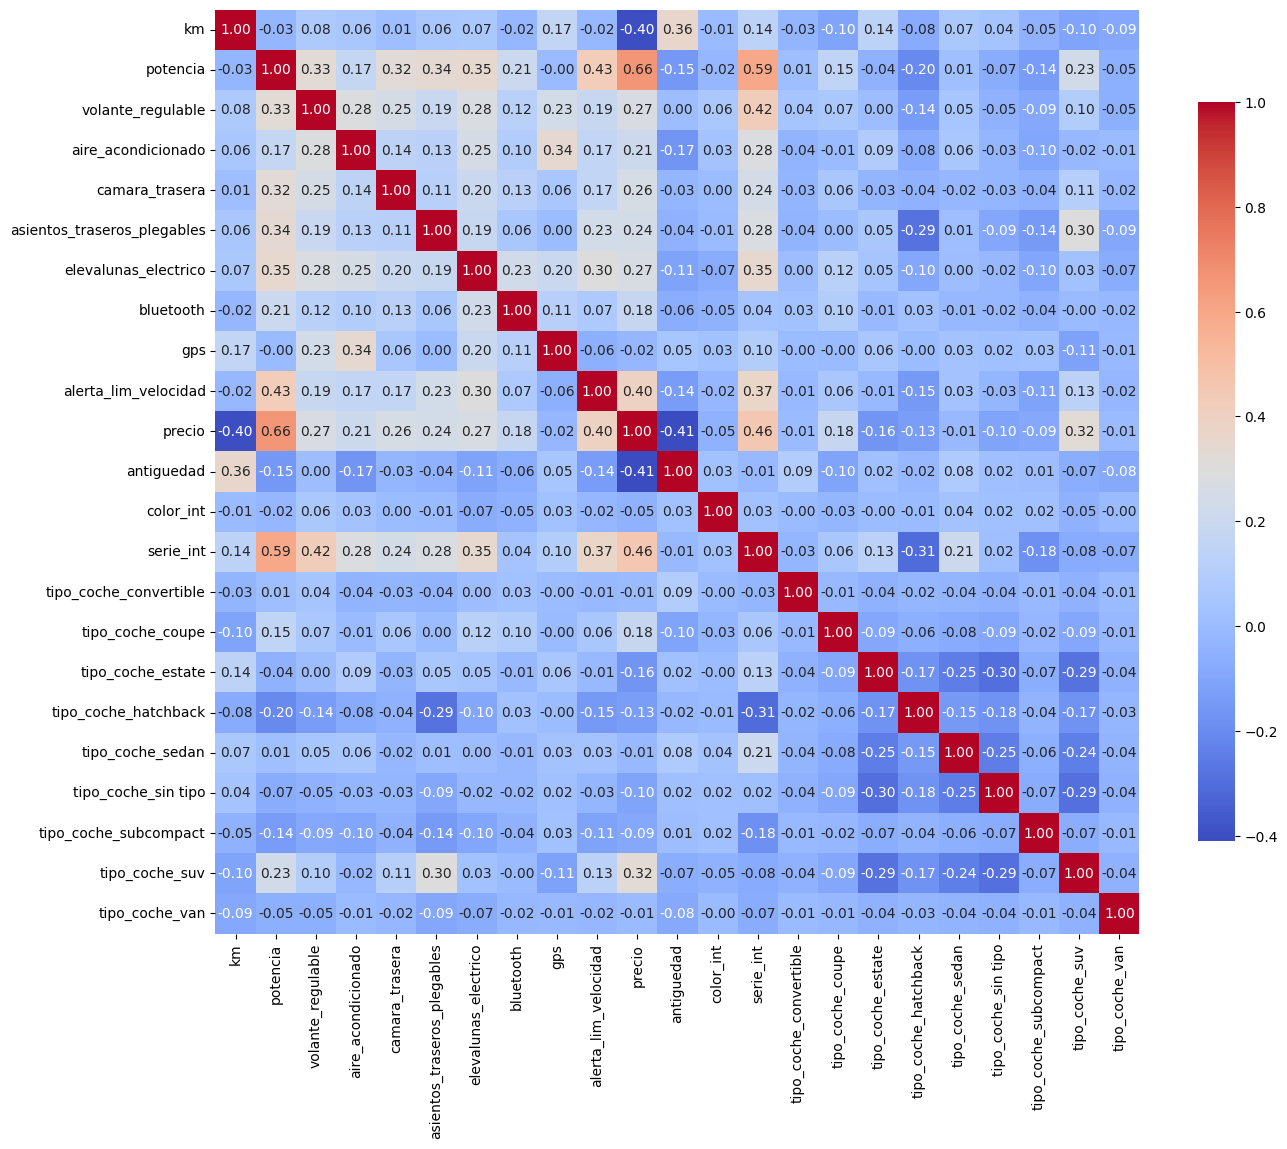

In [627]:
plt.figure(figsize=(15, 12))  
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.show()


### Exporto a solicitud del entregable, para su revisión

In [628]:
df_bmw50 = df_bmw.head(50)

In [630]:
#Exportamos 50 primeros datos
#file_name = "df_bmw50_export.csv"
#df_bmw50.to_csv(file_name, index=False)

In [396]:
df_bmw_final = df_bmw.copy()

In [397]:
df_bmw_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4663 non-null   float64
 1   potencia                     4663 non-null   float64
 2   volante_regulable            4663 non-null   int64  
 3   aire_acondicionado           4663 non-null   int64  
 4   camara_trasera               4663 non-null   int64  
 5   asientos_traseros_plegables  4663 non-null   int64  
 6   elevalunas_electrico         4663 non-null   int64  
 7   bluetooth                    4663 non-null   int64  
 8   gps                          4663 non-null   int64  
 9   alerta_lim_velocidad         4663 non-null   int64  
 10  precio                       4663 non-null   float64
 11  antiguedad                   4663 non-null   float64
 12  color_int                    4663 non-null   float64
 13  serie_int         

In [398]:
X= df_bmw_final.drop("precio",axis=1)

In [402]:
y= df_bmw_final["precio"]

In [403]:
X

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,serie_int,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.139949,0.095238,1,1,0,0,1,0,1,1,...,0.000000,0,0,0,0,0,1,0,0,0
1,0.182839,0.151261,0,0,0,1,1,0,1,0,...,0.285714,0,0,0,0,0,1,0,0,0
2,0.127572,0.193277,1,1,0,1,1,1,1,1,...,0.428571,1,0,0,0,0,0,0,0,0
3,0.096631,0.263305,1,1,0,0,0,1,1,1,...,0.428571,0,0,0,0,0,1,0,0,0
4,0.151891,0.445378,1,1,0,0,1,1,1,1,...,0.285714,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,0.039271,0.123249,0,1,0,0,0,0,1,0,...,0.142857,0,0,0,0,0,0,0,0,1
4659,0.049361,0.095238,0,1,0,0,0,0,1,1,...,0.142857,0,0,0,0,0,0,0,0,1
4660,0.019159,0.123249,0,1,0,0,0,0,1,1,...,0.142857,0,0,0,0,0,0,0,0,1
4661,0.027447,0.123249,1,1,0,0,0,0,1,1,...,0.142857,0,0,0,0,0,0,0,0,1


In [405]:
len(X)

4663

In [406]:
from sklearn.model_selection import train_test_split

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [410]:
X_train

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,serie_int,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
1216,0.159384,0.193277,1,1,1,1,1,0,1,1,...,0.714286,0,0,1,0,0,0,0,0,0
3480,0.220981,0.095238,1,1,0,0,1,0,1,1,...,0.714286,0,0,0,0,0,1,0,0,0
420,0.155932,0.151261,0,1,0,1,0,0,0,1,...,0.285714,0,0,0,0,0,1,0,0,0
3001,0.149894,0.151261,0,1,0,1,0,1,1,1,...,0.285714,0,0,0,0,1,0,0,0,0
6,0.115096,0.109244,1,1,0,0,0,1,1,0,...,0.000000,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.136496,0.193277,0,1,1,1,1,1,1,1,...,0.285714,0,0,0,0,0,0,0,1,0
466,0.115034,0.193277,0,1,0,1,0,0,0,1,...,0.285714,0,0,0,0,0,1,0,0,0
3092,0.096792,0.193277,0,0,0,1,0,0,1,0,...,0.285714,0,0,0,0,1,0,0,0,0
3772,0.152123,0.263305,1,1,1,1,1,0,1,1,...,0.714286,0,0,0,0,0,0,0,1,0


In [411]:
X_test

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,serie_int,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
2759,0.157544,0.193277,1,1,0,1,1,0,1,1,...,0.714286,0,0,0,0,1,0,0,0,0
1849,0.110770,0.109244,0,1,0,0,1,0,1,0,...,0.285714,0,0,0,1,0,0,0,0,0
2277,0.186307,0.053221,0,1,0,0,0,0,1,0,...,0.000000,0,0,0,0,0,1,0,0,0
23,0.043190,0.319328,1,0,0,0,1,0,1,0,...,0.571429,1,0,0,0,0,0,0,0,0
1175,0.155861,0.151261,1,1,0,0,0,0,1,1,...,0.285714,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.186002,0.053221,0,0,0,0,0,0,1,0,...,0.285714,0,0,0,0,0,1,0,0,0
3702,0.090805,0.193277,1,1,1,1,1,0,1,1,...,0.285714,0,0,0,0,0,0,0,1,0
1225,0.131177,0.109244,0,0,0,0,1,1,1,1,...,0.285714,0,0,1,0,0,0,0,0,0
4597,0.071888,0.459384,1,1,1,1,1,1,1,1,...,0.714286,0,0,0,0,0,0,0,1,0


In [412]:
from sklearn.linear_model import LinearRegression

In [413]:
lin_reg = LinearRegression()

In [414]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [415]:
lin_reg

LinearRegression()

In [416]:
y_pred = lin_reg.predict(X_test)

In [417]:
y_pred

array([18779.29432128, 13974.72765586,  5111.95441123, ...,
       12058.89542401, 36511.22445649, 22744.44695024])

In [418]:
y_test

2759    16500.0
1849    16700.0
2277     7900.0
23      20800.0
1175    13300.0
         ...   
1006    10700.0
3702    19600.0
1225    10900.0
4597    42100.0
2910    23400.0
Name: precio, Length: 1399, dtype: float64

In [419]:
df_resultado = pd.DataFrame({"Actual":y_test, "Predecido": y_pred})

In [420]:
df_resultado

,Actual,Predecido
2759,16500.0,18779.294321
1849,16700.0,13974.727656
2277,7900.0,5111.954411
23,20800.0,17402.165342
1175,13300.0,14624.577179
...,...,...
1006,10700.0,7142.096418
3702,19600.0,20881.445853
1225,10900.0,12058.895424
4597,42100.0,36511.224456


In [422]:
from sklearn import metrics

In [423]:
print("MAE", metrics.mean_absolute_error(y_test,y_pred))

MAE 2777.535698278212


In [424]:
df_resultado["dif"]= df_resultado["Predecido"]-df_resultado["Actual"]

array([[<Axes: title={'center': 'dif'}>]], dtype=object)

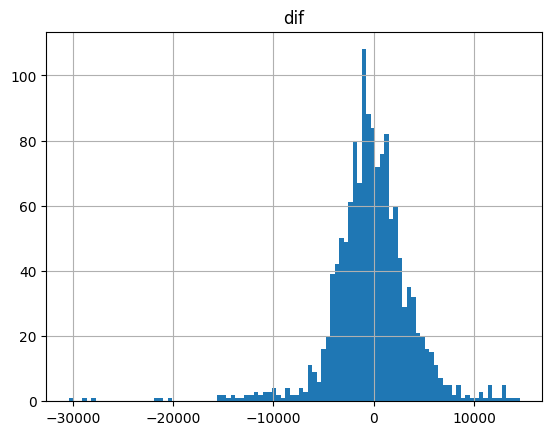

In [425]:
df_resultado.hist("dif",bins=100)

In [631]:
#Exportamos 50 primeros datos
file_name = "df_bmw_forBI.csv"
df_bmw.to_csv(file_name, index=False)